In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as stm
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
av=pd.read_csv('avacoda.csv', sep = ',')

In [3]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
av=av.iloc[:,1:]

In [5]:
av=av.drop(['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1)

In [6]:
# Data has huge number of null values at the bottem which needs to be removed 
# Data should be cleaned and relevet columns are kept
av = av.dropna(how='any',axis=0)

In [7]:
av.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,conventional,2015.0,Albany


In [8]:
av.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: float64(6), object(3)
memory usage: 118.5+ KB


In [9]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,2016.000000


In [10]:
av.isnull().sum()  # Will show you null count for each column, but will not count Zeros as null

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

# EDA

In [11]:
# Lets convert date column format into date, month separately
av['Date']=pd.to_datetime(av['Date'])
av['Month']=av['Date'].apply(lambda x:x.month)
av['Day']=av['Date'].apply(lambda x:x.day)

In [12]:
av.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015.0,Albany,11,29


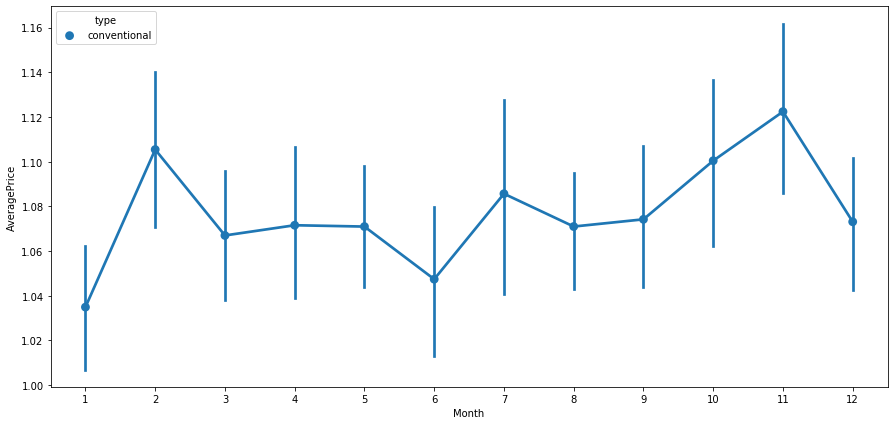

In [13]:
 plt.figure(figsize=(15, 7))
sns.pointplot(x="Month", y="AveragePrice", hue='type', data=av)
plt.show()

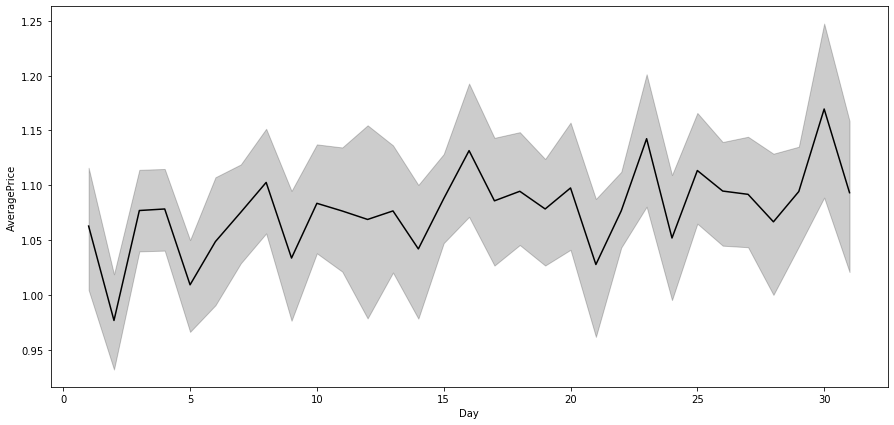

In [14]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Day", y="AveragePrice", data=av, color='black')
plt.show()  

In [15]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'year', 'region', 'Month', 'Day'],
      dtype='object')

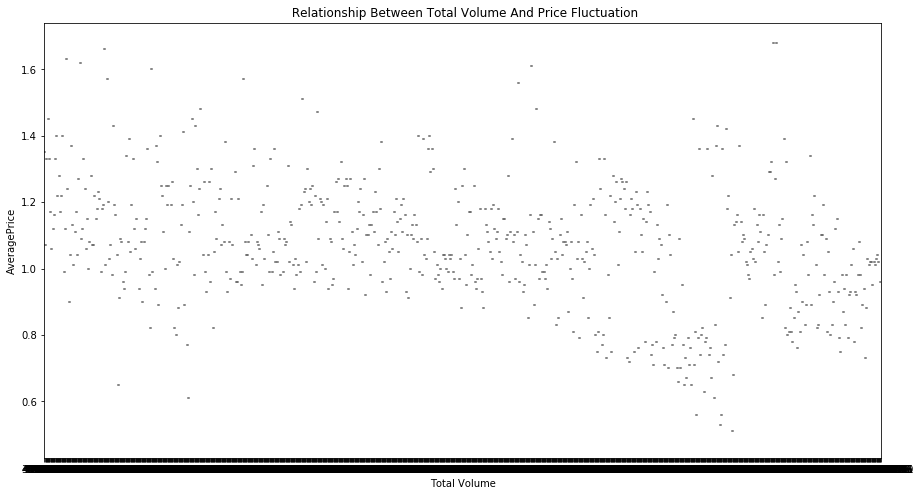

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.violinplot(y='AveragePrice', x='Total Volume', data=av, ax=ax, palette="Set3")  
ax.set_title(' Relationship Between Total Volume And Price Fluctuation')  
plt.show() 

In [17]:
av = av.set_index(['Date'])
av.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-06-12',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-08-11',
               '2015-01-11', '2015-10-25',
               ...
               '2016-11-20', '2016-11-13', '2016-06-11', '2016-10-30',
               '2016-10-23', '2016-10-16', '2016-09-10', '2016-02-10',
               '2016-09-25', '2016-09-18'],
              dtype='datetime64[ns]', name='Date', length=1517, freq=None)

In [18]:
y = av['AveragePrice'].resample('MS').mean()

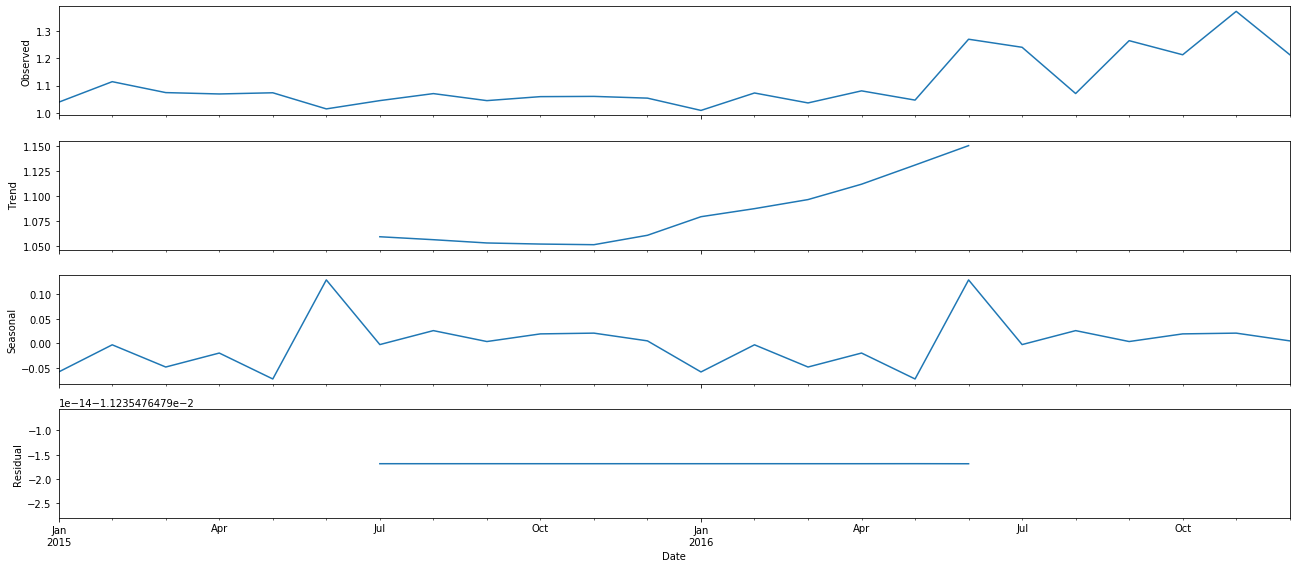

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = stm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Text(0.5, 1.0, 'Avearge Price of Avacado')

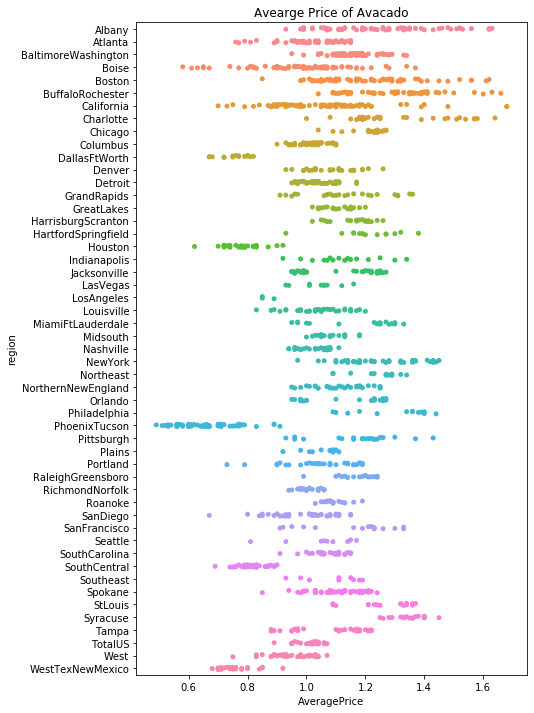

In [20]:
plt.figure(figsize=(7, 12))
sns.stripplot(x="AveragePrice", y="region", data=av) 
plt.title('Avearge Price of Avacado')

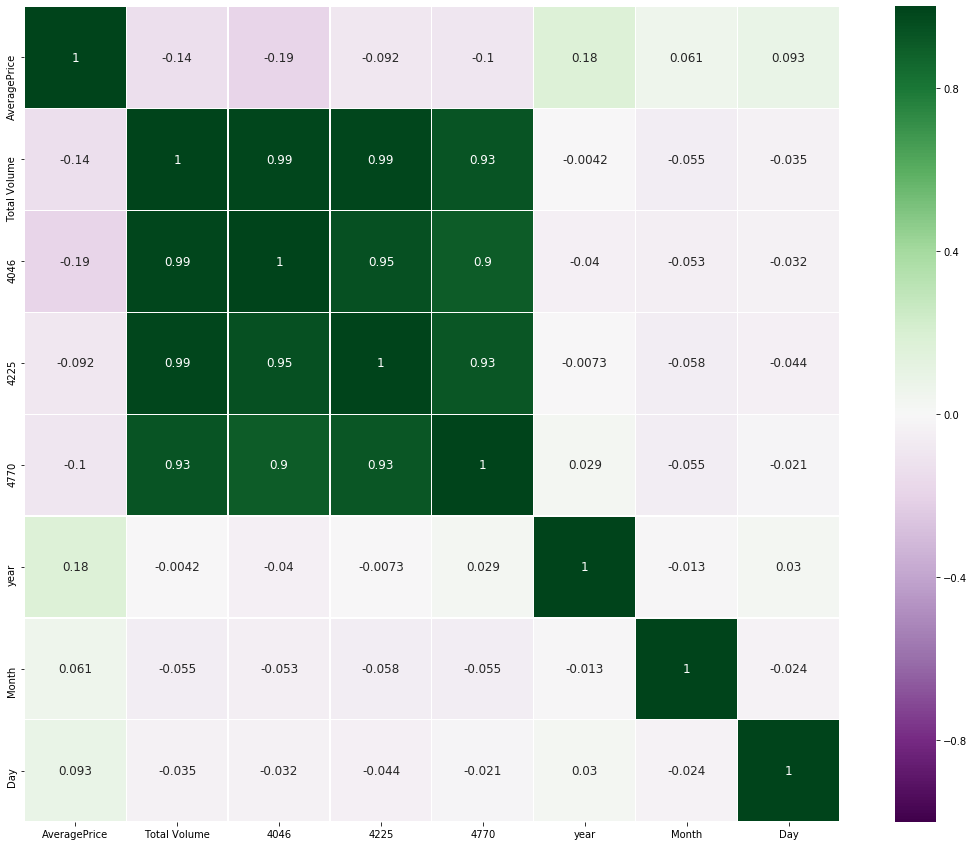

In [21]:
av_corr = av.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(av_corr[(av_corr >= 0.4) | (av_corr <= 0.8)], 
            cmap='PRGn', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

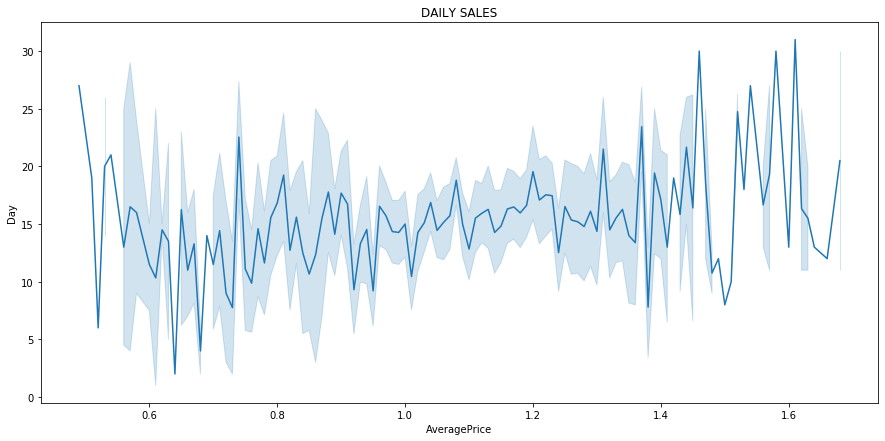

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))  
sns.lineplot(x='AveragePrice', y='Day', data=av, ax=ax,palette="Set1" )  
ax.set_title('DAILY SALES')  
plt.show()  

In [27]:
av.skew()      #checking skewness

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

In [29]:
for index in av.skew().index:              #removing skewness
    if av.skew().loc[index]>0.5:
        av[index]=np.log1p(av[index])
    if av.skew().loc[index]<-0.5:
        av[index]=np.square(av[index])

In [31]:
av.skew()                 #rechecking skewness

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

In [32]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
av['type'] = labelencoder.fit_transform(av['type'])
av

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
Date,,,,,,,,,,
2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,0,7.608871,Albany,12,27
2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,0,7.608871,Albany,12,20
2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,0,7.608871,Albany,12,13
2015-06-12,1.08,11.277116,7.032624,11.184108,4.298373,0,7.608871,Albany,6,12
2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,0,7.608871,Albany,11,29
2015-11-22,1.26,10.932764,7.077726,10.780393,3.797958,0,7.608871,Albany,11,22
2015-11-15,0.99,11.332060,7.222508,11.207401,4.546057,0,7.608871,Albany,11,15
2015-08-11,0.98,11.603034,6.557843,11.530926,4.394449,0,7.608871,Albany,8,11
2015-01-11,1.02,11.511048,6.930641,11.377296,4.458293,0,7.608871,Albany,1,11


# Train Test Split

In [34]:
x=av.iloc[:,0:5]
y=av['type']

In [35]:
#standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_x = sc.fit_transform(x)
print(feature_x)

[[ 1.35048079 -1.35676174 -1.82816171 -0.56752404 -1.81061284]
 [ 1.45639674 -1.46638736 -2.01206913 -0.68423257 -1.73759363]
 [-0.76783831 -0.9321394  -1.94183376 -0.15924137 -1.42852642]
 ...
 [ 2.14485045 -0.64565294 -0.20190426 -0.58460671  0.4534771 ]
 [ 2.09189247 -0.60503087 -0.13577946 -0.57688492  0.4706876 ]
 [ 1.88006056 -0.62805557 -0.23299293 -0.5703497   0.44944229]]


In [36]:
# Reshaping
y=av['type'].values.reshape(-1,1)
print(y.shape)

(1517, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [41]:
models = []
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))
models.append(("RF", RandomForestClassifier()))

In [42]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=52)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 1.0
GNB 1.0
DT 1.0
XGB 1.0
LGBM 1.0
ADA 1.0
RF 1.0


In [49]:
name = []
for name,model in models:
    
    model.fit(x_train, y_train)
    clf_prediction = model.predict(x_test)
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",model,":\n", _conf_matrix)
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))

Confusion matrix of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') :
 [[456]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       456

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Confusion matrix of GaussianNB(priors=None, var_smoothing=1e-09) :
 [[456]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       456

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Confusion matrix of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              

# Regression

In [50]:
av.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
Date,,,,,,,,,,
2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,0,7.608871,Albany,12,27
2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,0,7.608871,Albany,12,20
2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,0,7.608871,Albany,12,13
2015-06-12,1.08,11.277116,7.032624,11.184108,4.298373,0,7.608871,Albany,6,12
2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,0,7.608871,Albany,11,29


In [53]:
r_y=av['AveragePrice']
r_x=av['AveragePrice'].values.reshape(-1,1)
print(r_x.shape)
print(r_y.shape)

(1517, 1)
(1517,)


In [55]:
x1_train,x1_test,y1_train,y1_test=train_test_split(r_x,r_y,test_size=0.30,random_state=45)

In [56]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor

In [57]:
model_p = []
model_p.append(("LinearReg",LinearRegression()))
model_p.append(("KNN",KNeighborsRegressor()))
model_p.append(("DT", DecisionTreeRegressor()))
model_p.append(("XGB", XGBRegressor()))
model_p.append(("LGBM", LGBMRegressor()))
model_p.append(("ADA",AdaBoostRegressor()))
model_p.append(("RF", RandomForestRegressor()))

In [58]:
results = []
names = []
for name,model in model_p:
    kfold = KFold(n_splits=10, random_state=52)
    cv_result = cross_val_score(model,x1_train,y1_train, cv = kfold,scoring = "r2")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LinearReg 1.0
KNN 0.9997810940551641
DT 0.9999374878730899
XGB 0.9999196939367317
LGBM 0.9958127732203217
ADA 0.9961619828411001
RF 0.9999088311819729


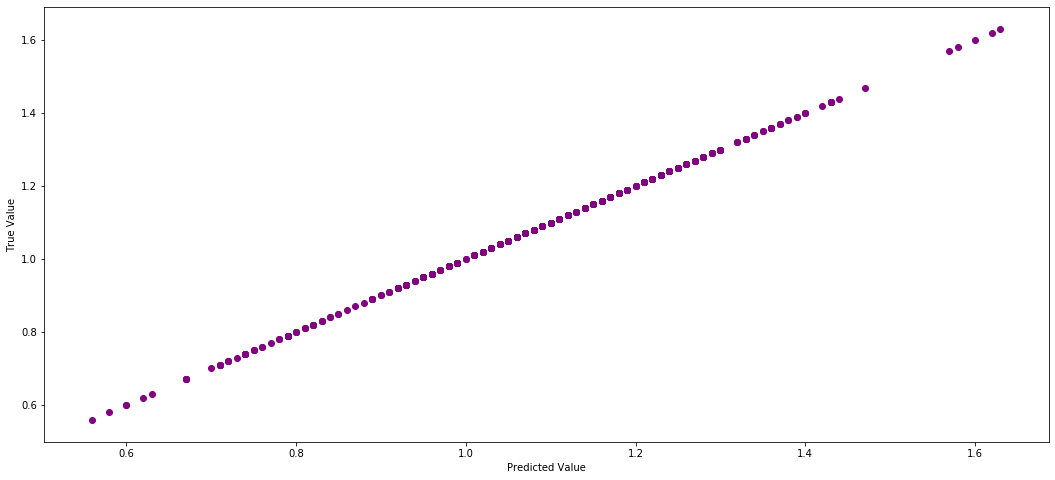

R2_Score: 1.0
MAE: 3.23815048849004e-17
MSE: 3.5950692295228405e-33
RMSE: 5.99588961666477e-17


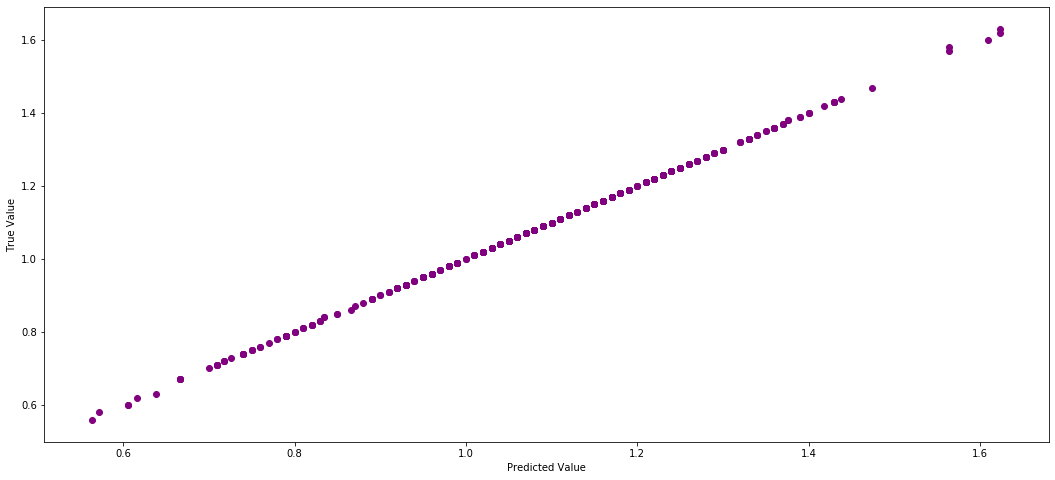

R2_Score: 0.9999388547093069
MAE: 0.00030263157894737624
MSE: 2.043859649122799e-06
RMSE: 0.001429636194674295


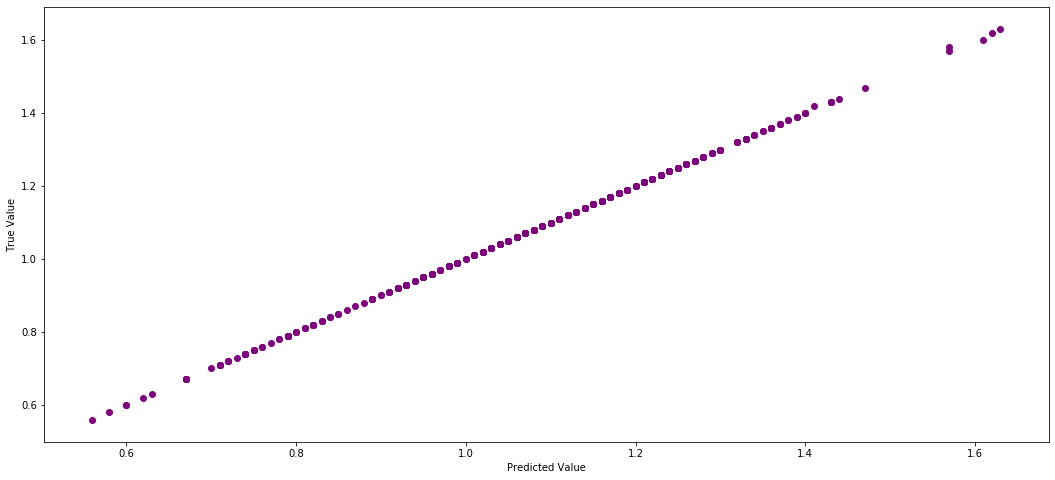

R2_Score: 0.9999803180394765
MAE: 6.57894736844392e-05
MSE: 6.578947368421065e-07
RMSE: 0.0008111071056538135


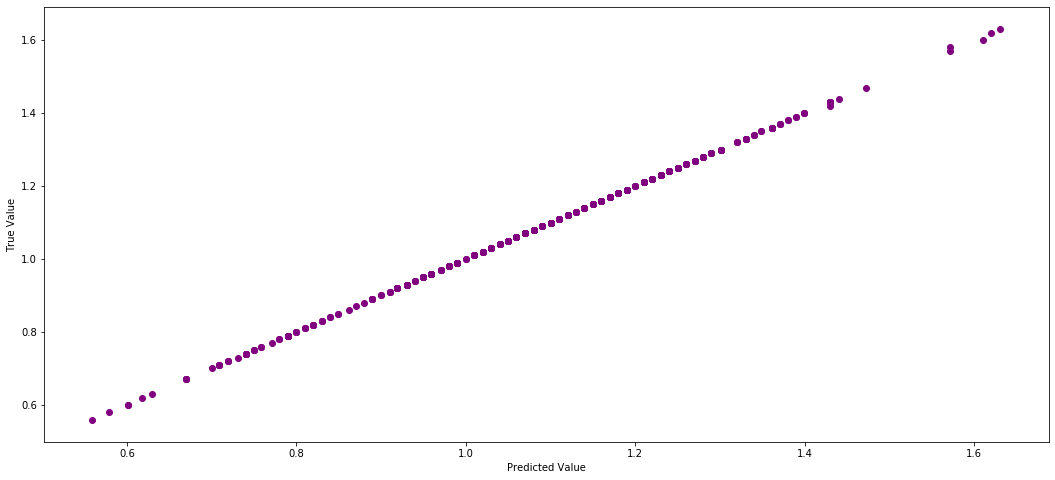

R2_Score: 0.9999727837676052
MAE: 0.0004762715205811553
MSE: 9.097374231466037e-07
RMSE: 0.0009538015638205904


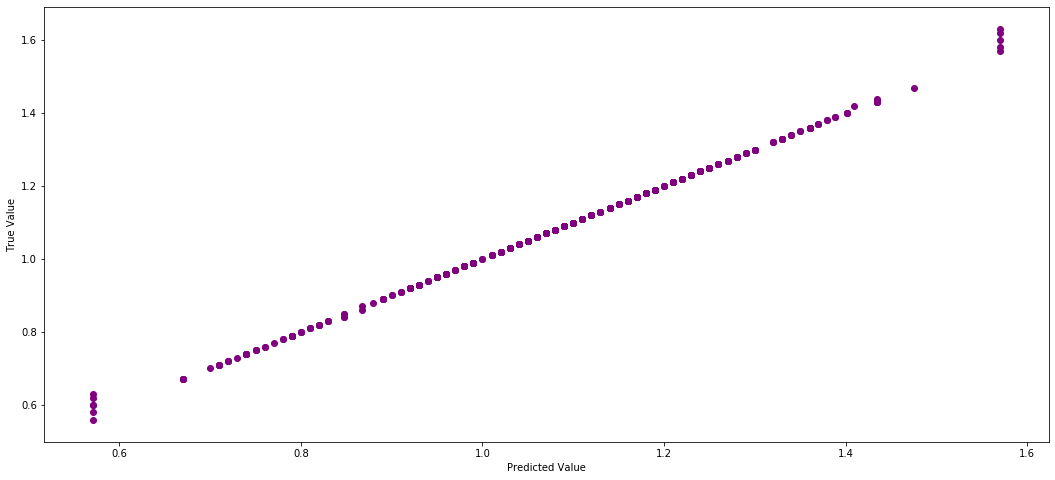

R2_Score: 0.9989918689658012
MAE: 0.0009291152551308491
MSE: 3.369807091388736e-05
RMSE: 0.00580500395468318


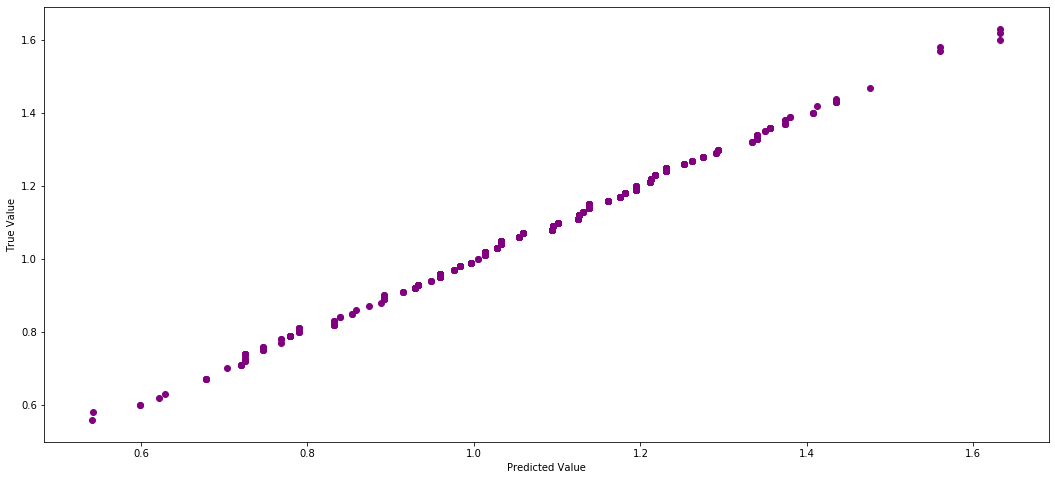

R2_Score: 0.9975861276508223
MAE: 0.0072733973388419155
MSE: 8.068677467538187e-05
RMSE: 0.008982581737751228


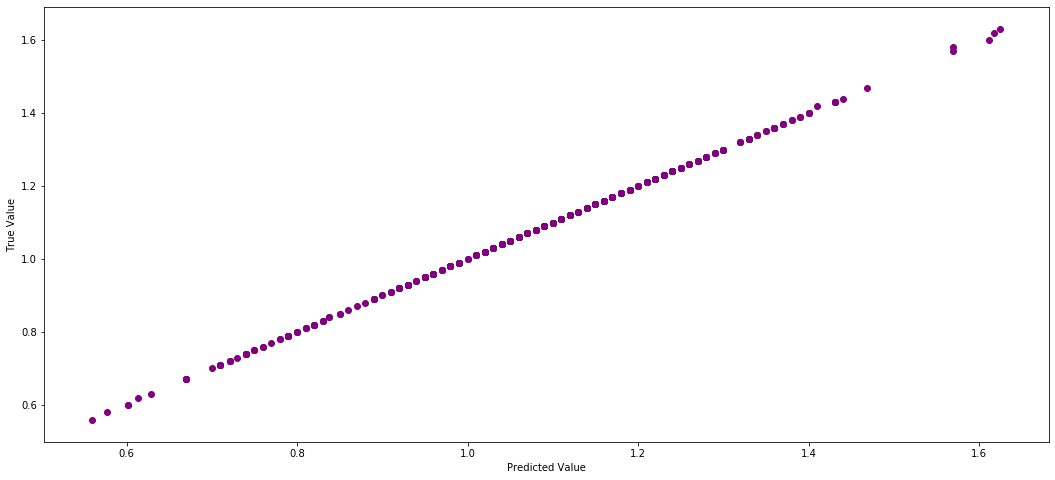

R2_Score: 0.9999684432566273
MAE: 0.000151315789473799
MSE: 1.0548245614034955e-06
RMSE: 0.0010270465234854238


In [60]:
result = []
names = []
for name,model in model_p:
    
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    plt.scatter(pred, y1_test, color='purple')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()
    
    r2=r2_score(y1_test, pred)
    print('R2_Score:', r2)
    print('MAE:', metrics.mean_absolute_error(y1_test, pred))
    print('MSE:', metrics.mean_squared_error(y1_test, pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, pred)))


In [ ]:
from sklearn.externals import joblib    #save the project through joblib
joblib.dump(RF, 'Avacado.pkl')